In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
import pandas as pd
import itertools
import shutil
import glob
import random
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile
from PIL import Image
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



<a class="list-group-item list-group-item-action" data-toggle="list" href="#super" role="tab" aria-controls="profile"><span class="badge badge-primary badge-pill">1</span> <button type="button" class="btn btn-lg btn-danger" data-toggle="popover" title="Popover title" >UNDERSTAND THE DATA</button>
 </a>
 
 
<a class="list-group-item list-group-item-action" data-toggle="list" href="#super2" role="tab" aria-controls="profile"><span class="badge badge-primary badge-pill">2</span> <button type="button" class="btn btn-lg btn-danger" data-toggle="popover" title="Popover title" >CREATE SAMPLE</button>
 </a>
 

<a class="list-group-item list-group-item-action" data-toggle="list" href="#super3" role="tab" aria-controls="profile"><span class="badge badge-primary badge-pill">3</span> <button type="button" class="btn btn-lg btn-danger" data-toggle="popover" title="Popover title" >CONVERT DATAFRAME TO CSV
</button>
 </a>

<a class="list-group-item list-group-item-action" data-toggle="list" href="#super4" role="tab" aria-controls="profile"><span class="badge badge-primary badge-pill">4</span> <button type="button" class="btn btn-lg btn-danger" data-toggle="popover" title="Popover title" >CONVERT CSV TO IMAGES
</button>
 </a>
 
 
 <a class="list-group-item list-group-item-action" data-toggle="list" href="#super5" role="tab" aria-controls="profile"><span class="badge badge-primary badge-pill">5</span> <button type="button" class="btn btn-lg btn-danger" data-toggle="popover" title="Popover title" >INDICATE THE PATH
</button>
 </a>
 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#super6" role="tab" aria-controls="profile"><span class="badge badge-primary badge-pill">6</span> <button type="button" class="btn btn-lg btn-danger" data-toggle="popover" title="Popover title" >CREATE THE MODEL
</button>
 </a>
 
 <a class="list-group-item list-group-item-action" data-toggle="list" href="#super8" role="tab" aria-controls="profile"><span class="badge badge-primary badge-pill">7</span> <button type="button" class="btn btn-lg btn-danger" data-toggle="popover" title="Popover title" >BEFORE FREEZING
</button>
 </a>
 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#super9" role="tab" aria-controls="profile"><span class="badge badge-primary badge-pill">8</span> <button type="button" class="btn btn-lg btn-danger" data-toggle="popover" title="Popover title" >AFTER FREEZING
</button>
 </a>
 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#super10" role="tab" aria-controls="profile"><span class="badge badge-primary badge-pill">0</span> <button type="button" class="btn btn-lg btn-danger" data-toggle="popover" title="Popover title" >Extras
</button>
 </a>
 
 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#super11" role="tab" aria-controls="profile"><span class="badge badge-primary badge-pill">9</span> <button type="button" class="btn btn-lg btn-danger" data-toggle="popover" title="Popover title" >PREDICTION&RESULT
</button>
 </a>
 

<a id ="super"></a> 

# UNDERSTAND THE DATA

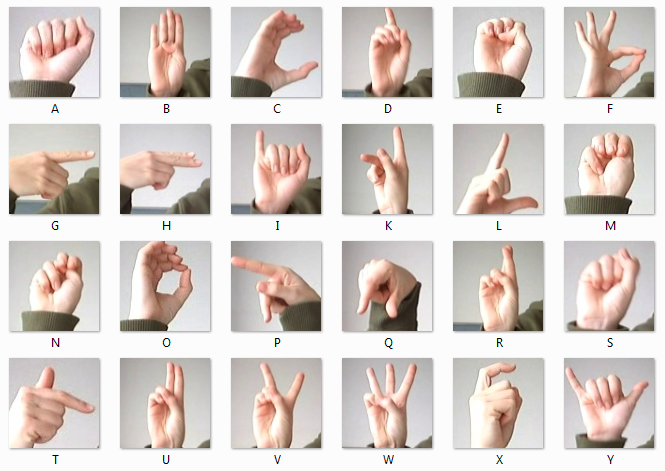

In [ ]:
train = pd.read_csv("../input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")

In [ ]:
train.head()

> OUR DATA IS NOT AN IMAGE, THEY SHARED IMAGES WITH THEIR PIXELS in a CSV file.

In [ ]:
test = pd.read_csv("../input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")

In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
train.iloc[1]

In [ ]:
train["pixel1"]

<a id ="super2"></a> 

# CREATE SAMPLE

In [ ]:
train_sample = train.loc[:499,:]
train_sample.shape

In [ ]:
train_sample.head

In [ ]:
valid_sample = train.iloc[-200:,:]
valid_sample.shape

In [ ]:
test_sample = test.loc[:199,:]
test_sample.shape

In [ ]:
type(test_sample)

<a id ="super3"></a> 

# CONVERT DATAFRAME TO CSV

In [ ]:
train_sample.to_csv("train_sample.csv",index=False)

In [ ]:
test_sample.to_csv("test_sample.csv",index=False)

In [ ]:
valid_sample.to_csv("valid_sample.csv",index=False)

<a id ="super4"></a> 

# CONVERT CSV TO IMAGES

   
        1.Add this data from the right-side. Link: https://www.kaggle.com/zehranrgi/how-to-convert-csv-to-images
        2.Make sure the file path is correct. ../input/how-to-convert-csv-to-images/make_imgs.py
        3.Run the following code.
        Your images are ready (:

        !python make_imgs.py --label label ./sign_mnist_test/test_sample.csv mnist-imgs/sample/test/ 
        !python make_imgs.py --label label ./sign_mnist_train/train_sample.csv mnist-imgs/sample/train/ 
        !python make_imgs.py --label label ./sign_mnist_valid/valid_sample.csv mnist-imgs/sample/valid/

   

In [ ]:
!python ../input/how-to-convert-csv-to-images/make_imgs.py --label label ./test_sample.csv ./mnist-imgs/sample/test/ 

In [ ]:
!python ../input/how-to-convert-csv-to-images/make_imgs.py --label label ./train_sample.csv ./mnist-imgs/sample/train/ 

In [ ]:
!python ../input/how-to-convert-csv-to-images/make_imgs.py --label label ./valid_sample.csv mnist-imgs/sample/valid/


     Let's look at the data first.

    We have 24 classes.
    
   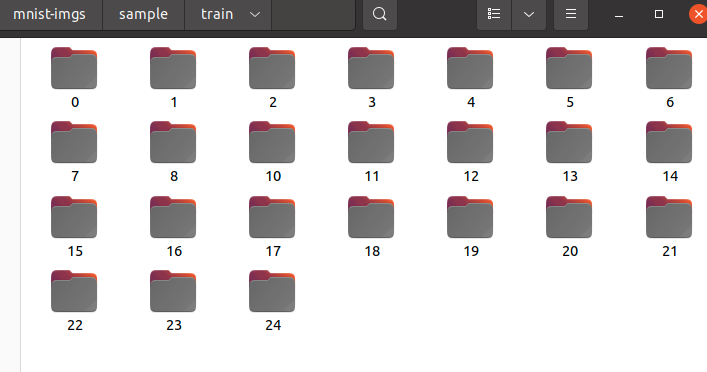

    And look at one of the folder. (Also, it is in the gray format, not RGB)

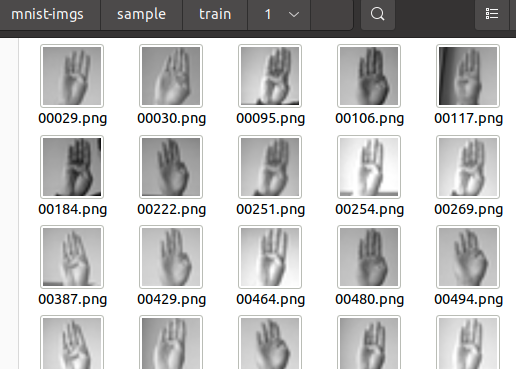


<a id ="super5"></a> 

# INDICATE THE PATH

In [ ]:
train_path = "./mnist-imgs/sample/train"
test_path = "./mnist-imgs/sample/test"
valid_path = "./mnist-imgs/sample/valid"

In [ ]:
train_btch = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)

valid_btch = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)

test_btch = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

<a id ="super6"></a> 

# CREATE THE MODEL

In [ ]:
mobil = tf.keras.applications.mobilenet.MobileNet()

In [ ]:
mobil.summary()

In [ ]:
take = mobil.layers[-6].output
output = Dense(units=24,activation="softmax")(take)

> *Sigmoid is generally used for binary classification problems.
> 
> *The softmax function can be used for multiclass classification problems.
> 
> MobileNet is Functional API not Sequential API.


In [ ]:
model = Model(inputs=mobil.input, outputs= output)

<a id ="super8"></a> 

# BEFORE FREEZING

In [ ]:
len(model.trainable_variables)

In [ ]:
len(model.non_trainable_variables)

In [ ]:
for layer in model.layers[:-23]:
    layer.trainable =False 

<a id ="super9"></a> 

# AFTER FREEZING

In [ ]:
len(model.trainable_variables)

In [ ]:
len(model.non_trainable_variables)

In [ ]:
model.summary()

<a id ="super10"></a> 

# Ready to Train

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Extras:

    By setting verbose 0, 1 or 2:

    verbose=0 will show you nothing (silent)

    verbose=1 will show you an animated progress bar like this:
    
 
 
     verbose=2 will just mention the number of epoch like this:
 


In [ ]:
model.fit(x=train_btch,validation_data=valid_btch,epochs=20,verbose=2)

<a id ="super11"></a> 

# PREDICTION & RESULTS

In [ ]:
test_label = test_btch.classes

In [ ]:
prediction = model.predict(x=test_btch, verbose=1)

In [ ]:
cm=confusion_matrix(y_true=test_label, y_pred=prediction.argmax(axis=1))

In [ ]:
test_btch.class_indices

In [ ]:
cm_label=[str(x) for x in range(24 + 1)]
print(cm_label)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
    
#It is directly from the documents.

In [ ]:

plot_confusion_matrix(cm=cm,classes=cm_label, title ="CONFUSION MATRIX")



> **It is not easy to understand this matrix so that I will look at the below.**

In [ ]:
from sklearn.metrics import confusion_matrix

classes=cm_label
y_true=test_label
y_pred=prediction.argmax(axis=1)

confusion = confusion_matrix(y_true, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_true, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_true, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_true, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_true, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_true, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_true, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_true, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_true, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_true, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_true, y_pred, average='weighted')))




***I welcome your comments for any corrections and improvements.**

***If we get more pictures, of course the accuracy will increase.**

***Please upvote if you like it.**

***Thanks! ***
